# Random Forest Regression
https://www.kaggle.com/mailology1/bike-sharing-random-forest-regression
https://towardsdatascience.com/improving-random-forest-in-python-part-1-893916666cd

Importing the libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import numpy as np

root = "../../"

Read suicide csv

In [2]:
suicide = pd.read_csv(root + 'CSV/Suicide/suicide_rates_08_18.csv', sep=',', index_col=0)
suicide.head(5)

,MUNCOD,RATE_08,RATE_09,RATE_10,RATE_11,RATE_12,RATE_13,RATE_14,RATE_15,RATE_16,RATE_17,RATE_18
0,110001,20.344224,8.212203,8.189337,4.127456,12.464166,7.773632,3.898332,11.728829,7.841292,11.793844,4.316485
1,110002,9.458389,2.338060,4.427031,4.368243,9.703818,1.974938,4.860976,4.789226,5.665936,9.315758,1.883807
2,110003,0.000000,14.936520,0.000000,0.000000,0.000000,15.396459,0.000000,31.471282,15.900779,0.000000,18.389114
3,110004,5.110972,7.626311,2.544497,1.266480,5.042229,1.164646,5.776607,6.878683,10.241588,5.649271,9.432516
4,110005,0.000000,0.000000,11.743981,0.000000,11.868028,0.000000,0.000000,11.119760,11.136478,5.576001,6.081245


Read disease files

In [3]:
disease = ""
path = root + "CSV/TabNet/Rates/"
all_files = glob.glob(path + "*.csv")

years = ["08", "09", "10", "11", "12", "13", "14", "15", "16", "17", "18"]

final_df = pd.DataFrame()


for year in years:
    col_year = "RATE_" + year
    year_df = suicide[[col_year, "MUNCOD"]]
    year_df = year_df.rename(columns={col_year: "SUICIDE_RATE"})
    for file in all_files:
        file_name = file.split("\\")[1]
        disease = file_name.split("_RATE")[0]
        
        disease_df = pd.read_csv(path + disease + '_RATE_08_18.csv', sep=',', index_col=0)
        disease_df = disease_df[[col_year, "MUNCOD"]]
        disease_df = disease_df.rename(columns={col_year: disease})

        year_df = pd.merge(disease_df, year_df, left_on="MUNCOD", right_on="MUNCOD")

    #year_df = year_df.drop("MUNCOD", axis=1)
    final_df = pd.concat([final_df, year_df])
    
final_df.head(5)
        

,TRAUMATISMO_INTRACRANIANO,MUNCOD,TRANSTORNOS_MENTAIS,TECIDO_MOLE,OSTEOPOROSE,INSUFICIENCIA_RENAL,INSUFICIENCIA_CARDIACA,HIV,HIPERTENSAO,ESCLEROSE_MULTIPLA,EPILEPSIA,ENXAQUECA,DPOC,DORSOPATIAS,DOENCA_DE_PARKINSON,DOENCA_CARDIACA,DIABETES_MELLITUS,CANCER,ASMA,SUICIDE_RATE
0,52.894983,110001,12.206535,0.000000,4.068845,4.068845,248.199536,0.000000,537.087521,0.0,16.275379,0.00000,248.199536,162.753794,0.000000,28.481914,219.717622,12.206535,777.149367,20.344224
1,6.988853,110009,0.000000,0.000000,0.000000,0.000000,45.427543,3.494426,213.160010,0.0,6.988853,0.00000,87.360660,41.933117,0.000000,20.966558,69.888528,48.921969,66.394101,0.000000
2,27.800945,110011,35.214531,1.853396,0.000000,9.266982,129.737744,1.853396,42.628116,0.0,18.533963,0.00000,83.402836,9.266982,0.000000,20.387360,155.685293,51.895098,87.109628,1.853396
3,88.521954,110012,5.419711,9.032852,1.806570,65.036538,274.598716,7.226282,167.107771,0.0,18.065705,0.00000,122.846794,46.067548,0.903285,40.647836,200.529325,74.972676,127.363220,10.839423
4,16.154219,110015,13.461849,8.077109,0.000000,16.154219,105.002423,2.692370,204.620107,0.0,18.846589,5.38474,210.004846,21.538959,0.000000,24.231328,145.387970,45.770287,110.387163,16.154219


In [24]:
high_rate = list(final_df[final_df["SUICIDE_RATE"] > 50]["MUNCOD"])

In [5]:
populacao = pd.read_csv(root + "CSV/Population/population_08_18.csv", index_col=0)
populacao.head()

,POP_18,MUNCOD,POP_17,POP_16,POP_15,POP_14,POP_13,POP_12,POP_11,POP_10,POP_09,POP_08
0,23167,110001,25437,25506,25578,25652,25728,24069,24228,24422,24354,24577
1,106168,110002,107345,105896,104401,102860,101269,92747,91570,90354,85541,84581
2,5438,110003,6224,6289,6355,6424,6495,6132,6221,6309,6695,6777
3,84813,110004,88507,87877,87226,86556,85863,79330,78959,78601,78675,78263
4,16444,110005,17934,17959,17986,18013,18041,16852,16939,17030,16622,16784


In [30]:
populacao[populacao["POP_18"] < 10000].shape

(2458, 12)

In [25]:
populacao[populacao["MUNCOD"].isin(high_rate)]

,POP_18,MUNCOD,POP_17,POP_16,POP_15,POP_14,POP_13,POP_12,POP_11,POP_10,POP_09,POP_08
2621,21763,313350,22158,22134,22109,22082,22054,21399,21388,21377,21200,21220
4308,6817,412870,6878,6853,6828,6801,6775,6548,6531,6509,6531,6513
4458,11942,420990,11774,11584,11393,11200,11005,10526,10387,10248,9660,9549
4491,7475,421200,7558,7604,7652,7699,7747,7699,7732,7765,8145,8157
4618,6003,430070,6210,6216,6222,6228,6235,6035,6054,6073,6326,6331
4631,3573,430155,3718,3725,3732,3740,3748,3632,3648,3665,3789,3802
4635,6627,430170,6763,6759,6754,6749,6744,6521,6525,6529,6724,6716
4649,2590,430223,2579,2569,2559,2549,2537,2447,2436,2425,2583,2557
4673,5471,430380,5641,5645,5649,5653,5658,5476,5491,5509,5745,5746
4715,6746,430570,6836,6826,6815,6804,6791,6562,6557,6552,6873,6843


In [31]:
suicide_count = pd.read_csv(root + 'CSV/Suicide/suicide_count_08_18.csv', sep=',', index_col=0)
suicide_count[suicide_count["MUNCOD"].isin(high_rate)]

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total,MUNCOD
2535,2,1,1,2,6,1,7,10,6,8,11,55,313350
4165,0,1,1,0,0,1,3,1,0,0,4,11,412870
4318,1,3,1,1,0,2,3,2,8,4,1,26,420990
4351,4,1,0,3,0,2,3,0,1,4,1,19,421200
4476,0,0,2,2,2,5,1,2,1,1,2,18,430070
4489,0,0,2,0,1,2,1,0,0,0,0,6,430155
4493,1,2,5,1,0,0,0,1,1,1,0,12,430170
4507,1,0,2,1,0,1,0,0,0,0,0,5,430223
4531,1,0,0,4,1,0,0,1,1,0,1,9,430380
4573,0,1,1,0,0,0,0,0,1,0,5,8,430570


In [33]:
suicide_count["2018"].sum()

12733

In [23]:
suicide_count["Total"].describe()

count    5404.000000
mean       21.715026
std        97.822244
min         1.000000
25%         4.000000
50%         8.000000
75%        17.000000
max      5277.000000
Name: Total, dtype: float64

In [56]:
cadmun = pd.read_csv(root + "CSV/Cadmun/CADMUN.csv")
capitais = ["Rio Branco", "Maceió","Macapá", "Manaus", "Salvador", "Fortaleza","Brasília","Vitória","Goiânia","São Luís","Cuiabá", "Campo Grande", "Belo Horizonte"
"Belém", "João Pessoa", "Curitiba", "Recife", "Teresina", "Rio de Janeiro", "Natal", "Porto Alegre", "Porto Velho", "Boa Vista", "Florianópolis", "São Paulo", "Aracaju", "Palmas"]
capitais_df = cadmun[cadmun.MUNNOME.isin(capitais)][["MUNNOME", "MUNCOD"]]

In [71]:
capitais_df

,MUNNOME,MUNCOD
18,Porto Velho,110020
69,Rio Branco,120040
115,Manaus,130260
143,Boa Vista,140010
309,Macapá,160030
450,Palmas,172100
643,São Luís,211130
890,Teresina,221100
958,Fortaleza,230440
1173,Natal,240810


## First Analysis

Histogram of suicide rates

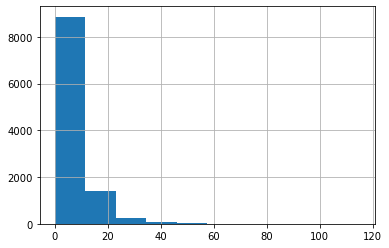

In [70]:
final_df["SUICIDE_RATE"].hist()

In [13]:
final_df["SUICIDE_RATE"].describe()

count    10659.000000
mean         7.076909
std          7.377966
min          0.000000
25%          2.750439
50%          5.380828
75%          9.172208
max        114.909509
Name: SUICIDE_RATE, dtype: float64

## Strategy 1: don't remove anything

Selecting X (independent variables) and y (dependent variable).

In [14]:
X = final_df.drop(columns="SUICIDE_RATE")
y = final_df["SUICIDE_RATE"]

RMSE: 9.767825295936131

Accuracy: 0.43018490996286357

## Strategy 2: imput values

In [23]:
import numpy as np
from sklearn.impute import SimpleImputer
df.loc[:, df.columns != 'RATE'] = df.loc[:, df.columns != 'RATE'].replace(0, np.nan)

X = df.iloc[:, 0:14].values
y = df.iloc[:, -1].values
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(X)
X = imputer.transform(X)

{'max_features': 'log2', 'n_estimators': 300}

RMSE: 9.453248697063861

Accuracy: 0.4555252020918406

## Strategy 3: remove rows + fill null

In [35]:
import numpy as np
N = 12
df.loc[:, df.columns != 'RATE'] = df.loc[:, df.columns != 'RATE'].replace(0, np.nan)
df = df.dropna(thresh=N) # At least N non null items
df = df.fillna(0)
X = df.iloc[:, 0:14].values
y = df.iloc[:, -1].values

{'max_features': 'log2', 'n_estimators': 300}

RMSE: 5.910890360138005

Accuracy: 0.20317934464122725

## Strategy 4: remove rows + imput values

In [83]:
import numpy as np
from sklearn.impute import SimpleImputer
N = 12
df.loc[:, df.columns != 'RATE'] = df.loc[:, df.columns != 'RATE'].replace(0, np.nan)
df = df.dropna(thresh=N) # At least N non null items

X = df.iloc[:, 0:14].values
y = df.iloc[:, -1].values

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(X)
X = imputer.transform(X)

{'max_features': 'sqrt', 'n_estimators': 200}

RMSE: 5.923165150865993

Accuracy: 0.19423204398310187

## Continue

Splitting the dataset into the Training set and Test set

In [24]:
from sklearn.model_selection import train_test_split
Xf_train, Xf_test, yf_train, yf_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [25]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

embeded_rf_selector = SelectFromModel(RandomForestRegressor(n_estimators=100))
embeded_rf_selector.fit(Xf_train, yf_train)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = Xf_train.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')
print(embeded_rf_feature)

7 selected features
['TRAUMATISMO_INTRACRANIANO', 'TRANSTORNOS_MENTAIS', 'TECIDO_MOLE', 'INSUFICIENCIA_RENAL', 'DPOC', 'DIABETES_MELLITUS', 'CANCER']


In [26]:
feat_list = list(embeded_rf_feature)

In [27]:
X_train = Xf_train[feat_list].copy()
X_test = Xf_test[feat_list].copy()
y_train = yf_train.copy()
y_test = yf_test.copy()

In [36]:
X_train.shape

(7994, 7)

Selecting best parameters

In [40]:
# Grid Search
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

regressor = RandomForestRegressor()
#parameters = [{'n_estimators' : [150,200,250,300], 'max_features' : ['auto','sqrt','log2']}]
param_grid = {
    'n_estimators': [150,200,250,300]
}
#grid_search = GridSearchCV(estimator = regressor, param_grid = param_grid,n_jobs=-1)
#grid_search = grid_search.fit(X_train, y_train)
#best_parameters = grid_search.best_params_

In [ ]:
best_parameters

Random Forest Regression model
Use the best parameters found from above to build the model

In [29]:
regressor = RandomForestRegressor(n_estimators = 200, max_features = 'sqrt') 
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Predicting the values 

In [30]:
y_pred = regressor.predict(X_test) 

Comparing predicted values with true values in testing set

In [31]:
from sklearn.metrics import mean_squared_error
import math
math.sqrt(mean_squared_error(y_test, y_pred))

6.762015710508617

In [32]:
regressor.score(X_test, y_test)

0.12929179422673565

In [33]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv =10)
accuracy.mean()

0.10156904161703999

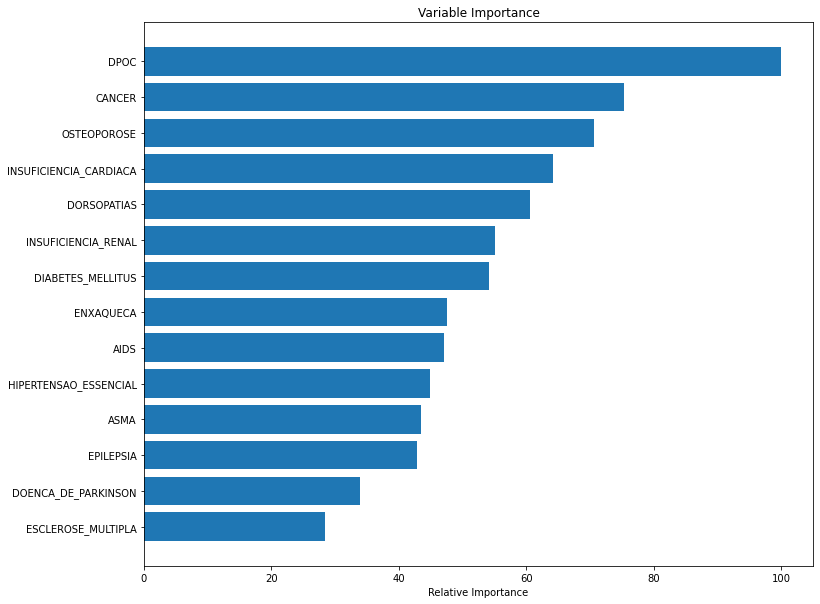

In [87]:
feature_importance = regressor.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [69]:
# Get numerical feature importances
importances = list(regressor.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(list(df.columns), importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: CANCER               Importance: 0.13
Variable: OSTEOPOROSE          Importance: 0.1
Variable: EPILEPSIA            Importance: 0.1
Variable: DPOC                 Importance: 0.1
Variable: INSUFICIENCIA_RENAL  Importance: 0.09
Variable: INSUFICIENCIA_CARDIACA Importance: 0.09
Variable: DIABETES_MELLITUS    Importance: 0.09
Variable: ASMA                 Importance: 0.08
Variable: HIPERTENSAO_ESSENCIAL Importance: 0.07
Variable: AIDS                 Importance: 0.06
Variable: DORSOPATIAS          Importance: 0.05
Variable: ENXAQUECA            Importance: 0.03
Variable: ESCLEROSE_MULTIPLA   Importance: 0.01
Variable: DOENCA_DE_PARKINSON  Importance: 0.01


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

Text(0, 0.5, 'Predicted')

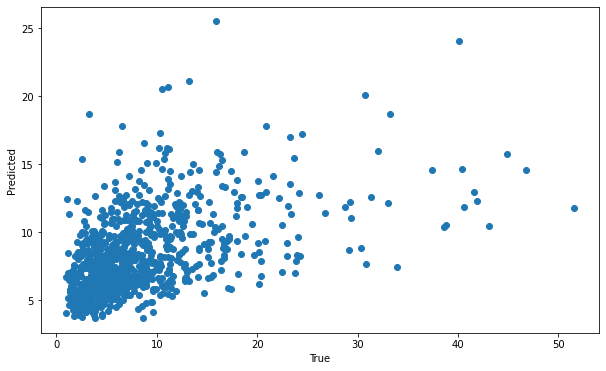

In [80]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.xlabel('True')
plt.ylabel('Predicted')